In [138]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.cluster import k_means
from sklearn.cluster import *


In [139]:
df = pd.DataFrame(columns=('name', 't', 'p'))

In [140]:
df.loc[0] = ['im1',1,2]
df.loc[1] = ['im2',1,1]
df.loc[2] = ['im3',1,1]
df.loc[3] = ['im4',2,1]
df.loc[4] = ['im6',2,1]
df.loc[5] = ['im6',2,2]
df.loc[6] = ['im6',0,3]
df.loc[7] = ['im6',0,0]
df.loc[8] = ['im6',2,2]
df.loc[9] = ['im6',2,2]
df.loc[11] = ['im6',2,2]

df.loc[10] = ['im6',3,0]
df.loc[11] = ['im2',3,0]
df.loc[12] = ['im3',3,3]
df.loc[13] = ['im4',3,3]
df.loc[14] = ['im6',3,3]



In [141]:
df

,name,t,p
0,im1,1,2
1,im2,1,1
2,im3,1,1
3,im4,2,1
4,im6,2,1
5,im6,2,2
6,im6,0,3
7,im6,0,0
8,im6,2,2
9,im6,2,2


In [142]:
num_classes = 4
conf_mat = np.zeros((num_classes,num_classes))


In [143]:
conf_mat[0][0]

0.0

In [144]:
for i in range(df.count()['name']):
    t = df.loc[i]['t']
    p = df.loc[i]['p']
    #print(conf_mat)
    conf_mat[t][p] =     conf_mat[t][p] +1
    #print(conf_mat)
for i in range(num_classes):
    conf_mat[i] = conf_mat[i]/sum(conf_mat[i])


[[ 0.5         0.          0.          0.5       ]
 [ 0.          0.66666667  0.33333333  0.        ]
 [ 0.          0.4         0.6         0.        ]
 [ 0.4         0.          0.          0.6       ]]


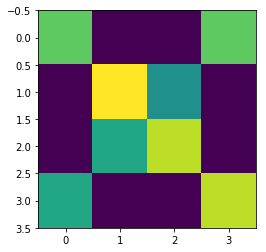

In [145]:
print(conf_mat)
plt.imshow(conf_mat)

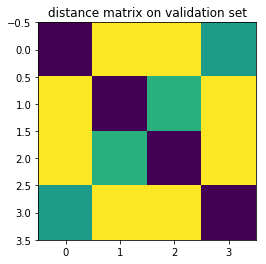

In [146]:
dist_mat = 1 - conf_mat
dist_mat[range(num_classes),range(num_classes)]=0
dist_mat = 0.5 * (dist_mat + dist_mat.T)
plt.figure()
plt.title('distance matrix on validation set')
plt.imshow(dist_mat)

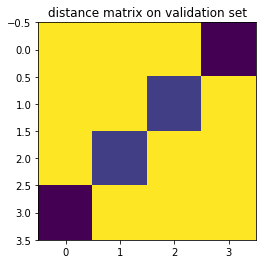

In [131]:
I = np.identity(num_classes)
dist_mat = I - conf_mat
dist_mat[range(num_classes),range(num_classes)]=0
dist_mat = 0.5 * (dist_mat + dist_mat.T)
plt.figure()
plt.title('distance matrix on validation set')
plt.imshow(dist_mat)

[ 0.5  0.5  0.5  0.5]


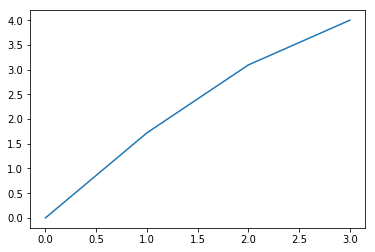

In [147]:
W=np.zeros((num_classes,num_classes))

k_nn, t, dim = 2, 0.9, 4

for i in range(num_classes):
    idx=np.argsort(dist_mat[i,:])[1:k_nn+1]
    W[i,idx]=np.exp(-dist_mat[i,idx] / t)
    W[idx,i]=W[i,idx]
D=np.zeros(W.shape)
for i in range(num_classes):
    D[i,i]=np.sum(W[i,:])
L=D-W
eig_val,eig_vec=scipy.linalg.eig(L,D)
ftr=eig_vec[:,1:dim+1]
print(eig_vec[:,0]) # the 1st eigenvector should be all ones
eigval_cumsum = np.cumsum(np.real(eig_val))
plt.plot(eigval_cumsum)

In [148]:
affinity_propagation_cluster = AffinityPropagation(damping=0.75, max_iter=15000, convergence_iter=50, copy=True) 
cluster_labels = affinity_propagation_cluster.fit_predict(ftr)
unique_cluster_label = np.unique(cluster_labels)
n_cluster = unique_cluster_label.shape[0]
cluster_members=[None]*n_cluster
print ('%d clusters' % n_cluster)

2 clusters


In [149]:
label_names=range(4)
for i in range(n_cluster):
    idx = np.nonzero(cluster_labels == unique_cluster_label[i])[0]
    cluster_members[i]=list(idx)
    print ('cluster %d size %d ' % (i, len(idx)))
    for j in range(len(idx)):
        print ('%s,' % label_names[idx[j]],)
    print (' ')

cluster 0 size 3 
0,
1,
3,
 
cluster 1 size 1 
2,
 
